# Stock Market Price Forecasting

# Objective

- Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on an exchange. The successful prediction of a stock's future price could yield significant profit.

- Predicting stock prices is a cumbersome task as it does not follow any specific pattern. Changes in the stock prices are purely based on supply and demand during a period of time. In order to learn the specific characteristics of a stock price, we can use an algorithm to identify these patterns through machine learning. One of the most well-known networks for series forecasting is LSTM (long short-term memory) which is a Recurrent Neural Network (RNN) that is able to remember information over , and and they are able to process the data step-by-step, maintaining an internal state where they cache the information they have seen so far in a summarized version. The successful prediction of a stock's future price could yield a significant profit.

- Main objective is to predict stock price accordingly in time series. Is uses time series forecasting. It gives prediction of future values based on previous historical values.

# Benefits

Stock Price Prediction using machine learning helps you discover the future value of company stock and other financial assets traded on an exchange. The entire idea of predicting stock prices is to gain significant profits.

In [51]:
import pandas as pd
import yfinance as yf
from datetime import date

import matplotlib.pyplot as plt

import numpy as np

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout

In [52]:
# data = yf.download("NIFTY", start="2010-01-01", end="2021-7-20")
data = pd.read_csv("NIFTY50_Data.csv")

In [53]:
data

,Date,Open,High,Low,Close
0,5-Jan-22,17820.10,17944.70,17748.85,17925.25
1,6-Jan-22,17768.50,17797.95,17655.55,17745.90
2,7-Jan-22,17797.60,17905.00,17704.55,17812.70
3,10-Jan-22,17913.30,18017.45,17879.15,18003.30
4,11-Jan-22,17997.75,18081.25,17964.40,18055.75
...,...,...,...,...,...
317,19-Apr-23,17653.35,17666.15,17579.85,17618.75
318,20-Apr-23,17638.60,17684.45,17584.35,17624.45
319,21-Apr-23,17639.75,17663.20,17553.95,17624.05
320,24-Apr-23,17707.55,17754.50,17612.50,17743.40


# Data Info

- As we can see data is of 5 futures and 322 entries.
- That 5 futures are ['Date','Open','High','Low','Close'].
- "Date" : Describing price range of that date. It is Object Data-type.
- "Open" : Describing price at which first trade happen at that date. It is float data-type.
- "High" : Describing Highest price at that date. It is float data-type.
- "Low"  : Describing Lowest price at that date. It is float data-type.
- "Close": Describing price at which last trade happen at that date. It is float data-type.

In [54]:
data.shape

(322, 5)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    322 non-null    object 
 1   Open    322 non-null    float64
 2   High    322 non-null    float64
 3   Low     322 non-null    float64
 4   Close   322 non-null    float64
dtypes: float64(4), object(1)
memory usage: 12.7+ KB


# Data Exploration

In [56]:
data.head()

,Date,Open,High,Low,Close
0,5-Jan-22,17820.10,17944.70,17748.85,17925.25
1,6-Jan-22,17768.50,17797.95,17655.55,17745.90
2,7-Jan-22,17797.60,17905.00,17704.55,17812.70
3,10-Jan-22,17913.30,18017.45,17879.15,18003.30
4,11-Jan-22,17997.75,18081.25,17964.40,18055.75


In [57]:
data.tail()

,Date,Open,High,Low,Close
317,19-Apr-23,17653.35,17666.15,17579.85,17618.75
318,20-Apr-23,17638.60,17684.45,17584.35,17624.45
319,21-Apr-23,17639.75,17663.20,17553.95,17624.05
320,24-Apr-23,17707.55,17754.50,17612.50,17743.40
321,25-Apr-23,17761.55,17807.45,17716.85,17769.25


In [58]:
close = data[['Close']]

<AxesSubplot:>

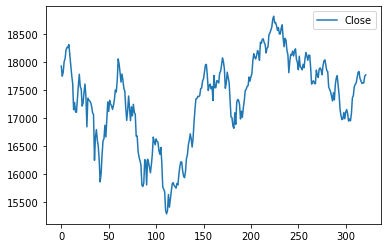

In [59]:
close.plot()

In [60]:
ds = close.values

In [61]:
ds

array([[17925.25],
       [17745.9 ],
       [17812.7 ],
       [18003.3 ],
       [18055.75],
       [18212.35],
       [18257.8 ],
       [18255.75],
       [18308.1 ],
       [18113.05],
       [17938.4 ],
       [17757.  ],
       [17617.15],
       [17149.1 ],
       [17277.95],
       [17110.15],
       [17101.95],
       [17339.85],
       [17576.85],
       [17780.  ],
       [17560.2 ],
       [17516.3 ],
       [17213.6 ],
       [17266.75],
       [17463.8 ],
       [17605.85],
       [17374.75],
       [16842.8 ],
       [17352.45],
       [17322.2 ],
       [17304.6 ],
       [17276.3 ],
       [17206.65],
       [17092.2 ],
       [17063.25],
       [16247.95],
       [16658.4 ],
       [16793.9 ],
       [16605.95],
       [16498.05],
       [16245.35],
       [15863.15],
       [16013.45],
       [16345.35],
       [16594.9 ],
       [16630.45],
       [16871.3 ],
       [16663.  ],
       [16975.35],
       [17287.05],
       [17117.6 ],
       [17315.5 ],
       [1724

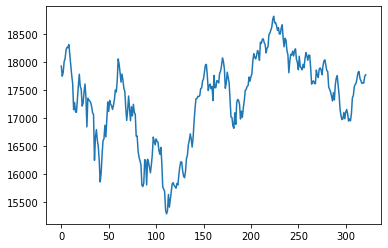

In [62]:
plt.plot(ds)

In [63]:
#Normalizing values between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scald = normalizer.fit_transform(np.array(ds).reshape(-1,1))

# Future Engineering

- In this we are we saw that we first scale our data using MinMaz Scaler in range of 0 & 1.
- And then reshape a data in a format that we wanted to use in our machine learning model.

In [64]:
len(ds_scald), len(ds)

(322, 322)

Spliting our data into train data and test data. We select our first 70% data for training process and last 30% data for testing process.

In [65]:
#Defining test and train data size
train_size = int(len(ds_scald)*0.70)
test_size = len(ds_scald) - train_size

In [66]:
 train_size, test_size

(225, 97)

In [67]:
ds_train, ds_test = ds_scald[0:train_size,:], ds_scald[train_size:len(ds_scald),:1]

In [68]:
len(ds_train), len(ds_test)

(225, 97)

In [69]:
def create_ds(dataset, step):
    Xtrain, Ytrain = [],  []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i+step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [70]:
time_stamp = 60
x_train, y_train = create_ds(ds_train,time_stamp)
x_test, y_test = create_ds(ds_test,time_stamp)

In [71]:
x_train.shape, y_train.shape

((164, 60), (164,))

In [72]:
x_test.shape, y_test.shape

((36, 60), (36,))

## Why to use LSTM?

- Here, I use a RNN as our machine learning model. And using LSTM, we train our model and Adam optimizer.
- First we make a neural network and then train our model on data.
- Here we use LSTM(RNN) because it is able to remember information over a long period of time, thus making them extremely useful for predicting stock prices. RNNs are well-suited to time series data, and they are able to process the data step-by-step, maintaining an internal state where they cache the information they have seen so far in a summarized version. 

In [73]:
#Reshaping
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [74]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 dropout_4 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_5 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100)              

In [75]:
#Training model with adam
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32)

Epoch 1/100
6/6 [==============================] - 6s 324ms/step - loss: 0.1921 - val_loss: 0.0127
Epoch 2/100
6/6 [==============================] - 1s 129ms/step - loss: 0.0726 - val_loss: 0.0234
Epoch 3/100
6/6 [==============================] - 1s 128ms/step - loss: 0.0475 - val_loss: 0.0159
Epoch 4/100
6/6 [==============================] - 1s 135ms/step - loss: 0.0359 - val_loss: 0.0136
Epoch 5/100
6/6 [==============================] - 1s 128ms/step - loss: 0.0362 - val_loss: 0.0109
Epoch 6/100
6/6 [==============================] - 1s 135ms/step - loss: 0.0329 - val_loss: 0.0124
Epoch 7/100
6/6 [==============================] - 1s 137ms/step - loss: 0.0298 - val_loss: 0.0124
Epoch 8/100
6/6 [==============================] - 1s 133ms/step - loss: 0.0274 - val_loss: 0.0113
Epoch 9/100
6/6 [==============================] - 1s 145ms/step - loss: 0.0245 - val_loss: 0.0109
Epoch 10/100
6/6 [==============================] - 1s 133ms/step - loss: 0.0242 - val_loss: 0.0109
Epoch 11/

6/6 [==============================] - 1s 134ms/step - loss: 0.0087 - val_loss: 0.0055
Epoch 84/100
6/6 [==============================] - 1s 145ms/step - loss: 0.0077 - val_loss: 0.0055
Epoch 85/100
6/6 [==============================] - 1s 134ms/step - loss: 0.0087 - val_loss: 0.0051
Epoch 86/100
6/6 [==============================] - 1s 145ms/step - loss: 0.0077 - val_loss: 0.0051
Epoch 87/100
6/6 [==============================] - 1s 137ms/step - loss: 0.0093 - val_loss: 0.0060
Epoch 88/100
6/6 [==============================] - 1s 135ms/step - loss: 0.0081 - val_loss: 0.0118
Epoch 89/100
6/6 [==============================] - 1s 146ms/step - loss: 0.0111 - val_loss: 0.0107
Epoch 90/100
6/6 [==============================] - 1s 134ms/step - loss: 0.0090 - val_loss: 0.0116
Epoch 91/100
6/6 [==============================] - 1s 139ms/step - loss: 0.0091 - val_loss: 0.0117
Epoch 92/100
6/6 [==============================] - 1s 138ms/step - loss: 0.0128 - val_loss: 0.0092
Epoch 93/100


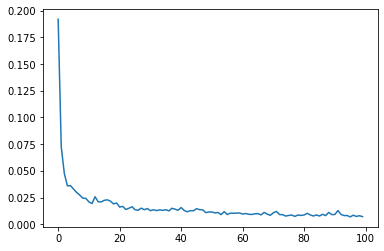

In [76]:
loss = model.history.history['loss']
plt.plot(loss)

In [77]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

2/2 [==============================] - 0s 16ms/step


In [78]:
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

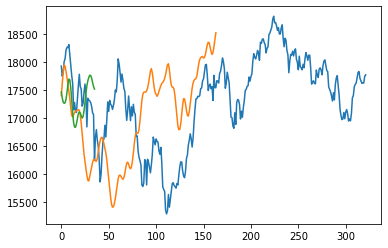

In [79]:
plt.plot(normalizer.inverse_transform(ds_scald))
plt.plot(train_predict)
plt.plot(test_predict)

In [80]:
type(train_predict)

numpy.ndarray

In [81]:
test = np.vstack((train_predict, test_predict))

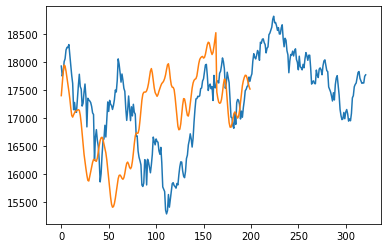

In [82]:
plt.plot(normalizer.inverse_transform(ds_scald))
plt.plot(test)

In [83]:
len(ds_scald)

322

In [84]:
#Getting the last 50 days records
fut_inp = ds_scald[272:]

In [85]:
fut_inp = fut_inp.reshape(1,-1)

In [86]:
tmp_inp = list(fut_inp)

In [87]:
fut_inp.shape

(1, 50)

In [88]:
#Creating list of last 50 days
tmp_inp = tmp_inp[0].tolist()

In [89]:
#Predict next 30 days price using the current data
#It will predict in sliding window manner(algorithm) with stride1
lst_output = []
n_steps = 50
i = 0
while(i<10):
    
    if(len(tmp_inp)>50):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp = fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1,n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1,n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[[0.6489355564117432], [0.6604725122451782], [0.6633093357086182], [0.6601630449295044], [0.6545849442481995], [0.6484883427619934], [0.642392635345459], [0.6362538933753967], [0.6299813985824585], [0.6235819458961487]]


In [90]:
len(ds_scald)

322

In [91]:
# Creating a dummy plane to plot graph one after another
plot_new = np.arange(1,51)
plot_pred = np.arange(51,61)

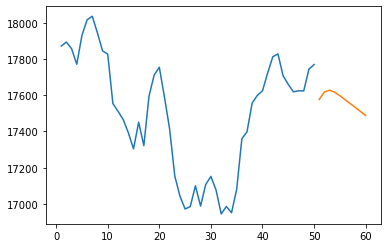

In [92]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scald[272:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [93]:
ds_new = ds_scald.tolist()

In [94]:
len(ds_new)

322

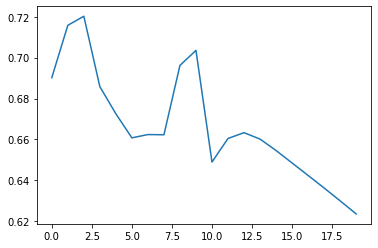

In [95]:
ds_new.extend(lst_output)
plt.plot(ds_new[312:])

In [96]:
final_graph = normalizer.inverse_transform(ds_new).tolist()

# Key Findings

Here we find next 10 days sotck price of Nifty50. also with this model, I get approximate but precise result.

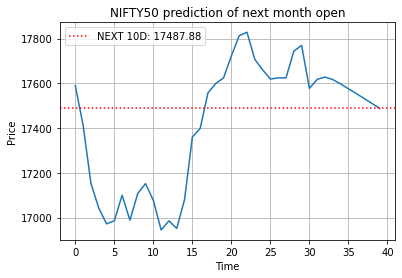

In [98]:
plt.plot(final_graph[292:],)
plt.ylabel("Price")
plt.xlabel("Time")
plt.grid()
plt.title("NIFTY50 prediction of next month open")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 10D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

# Next Step

Next step is to make our model, by adjusting timestamp, batch_size, and epochs.

by adjusting LSTM's parameter we can get approxe accurate result.